# Testing methods to obtain dynamical predictions using Return Maps

In [43]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
import numpy as np
import pandas as pd

import os
import pyfilaments.analysisutils as analysis

## Load a return map based on single-cycle data

In [68]:
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_sweep_FINAL/buckling_escape_angles_750_1.205.csv'

file = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/2022-11-16/buckling_escape_angles_625.0_1.5.csv'

df = pd.read_csv(file)

<IPython.core.display.Javascript object>


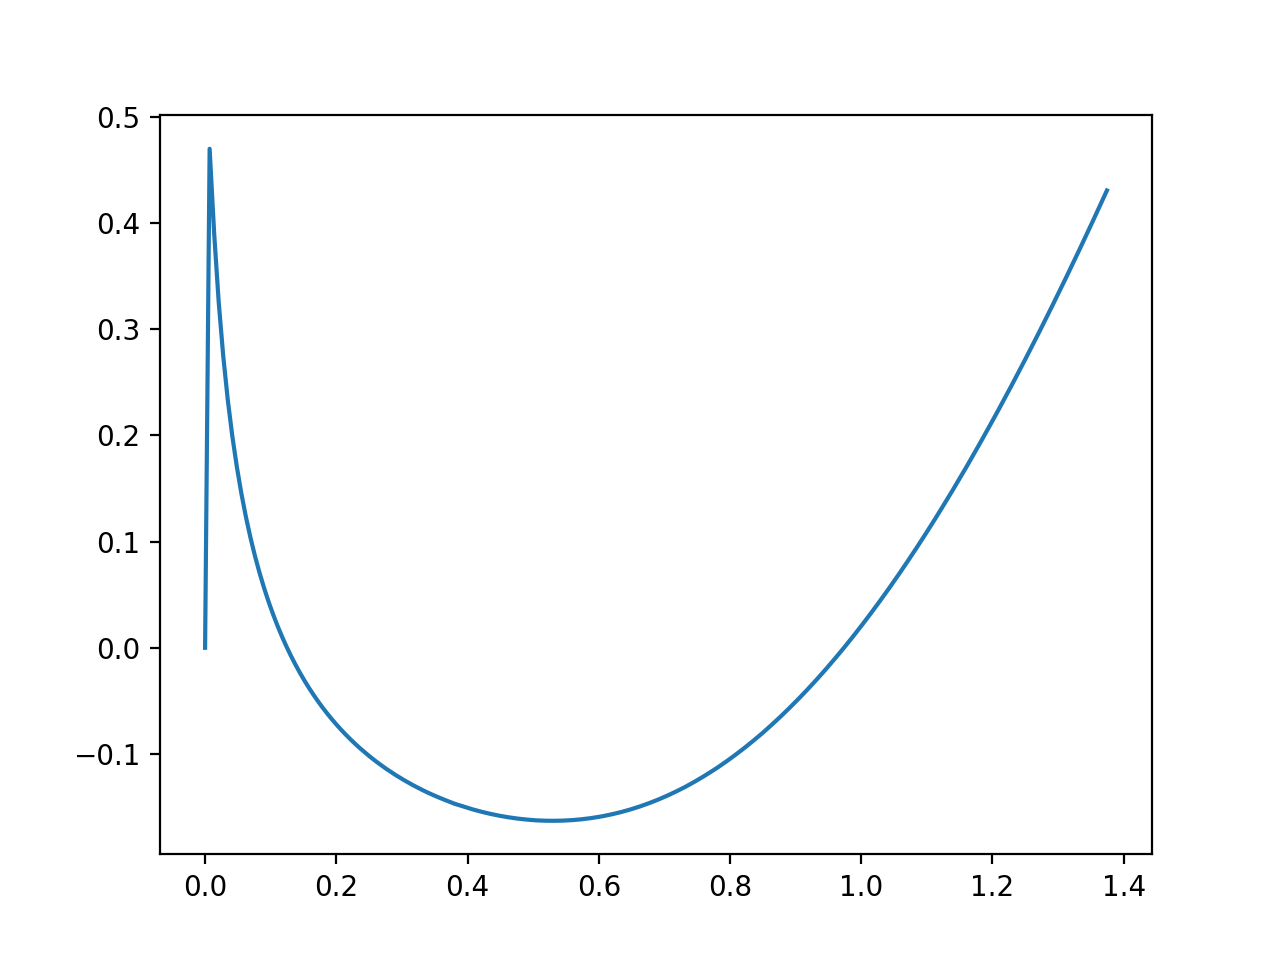

In [69]:

initial_angle_array = np.array(df['Initial angle (rad)'])
final_angle_array = np.array(df['Final angle (rad)'])

plt.figure()
plt.plot(initial_angle_array, final_angle_array)
plt.show()

In [70]:
# Create a function using the data as inputs using Interpolation

import scipy

# f = scipy.interpolate.InterpolatedUnivariateSpline(initial_angle_array_full, final_angle_array_full)

initial_angle_array_neg = -initial_angle_array
final_angle_array_neg = -final_angle_array

initial_angle_array_full = np.concatenate((initial_angle_array_neg, initial_angle_array))
final_angle_array_full = np.concatenate((final_angle_array_neg, final_angle_array))

idx = np.argsort(initial_angle_array_full)

initial_angle_array_full = initial_angle_array_full[idx]
final_angle_array_full = final_angle_array_full[idx]



init_angle_new = np.linspace(min(initial_angle_array_full), max(initial_angle_array_full),200)

f = scipy.interpolate.interp1d(initial_angle_array_full, final_angle_array_full)

<IPython.core.display.Javascript object>


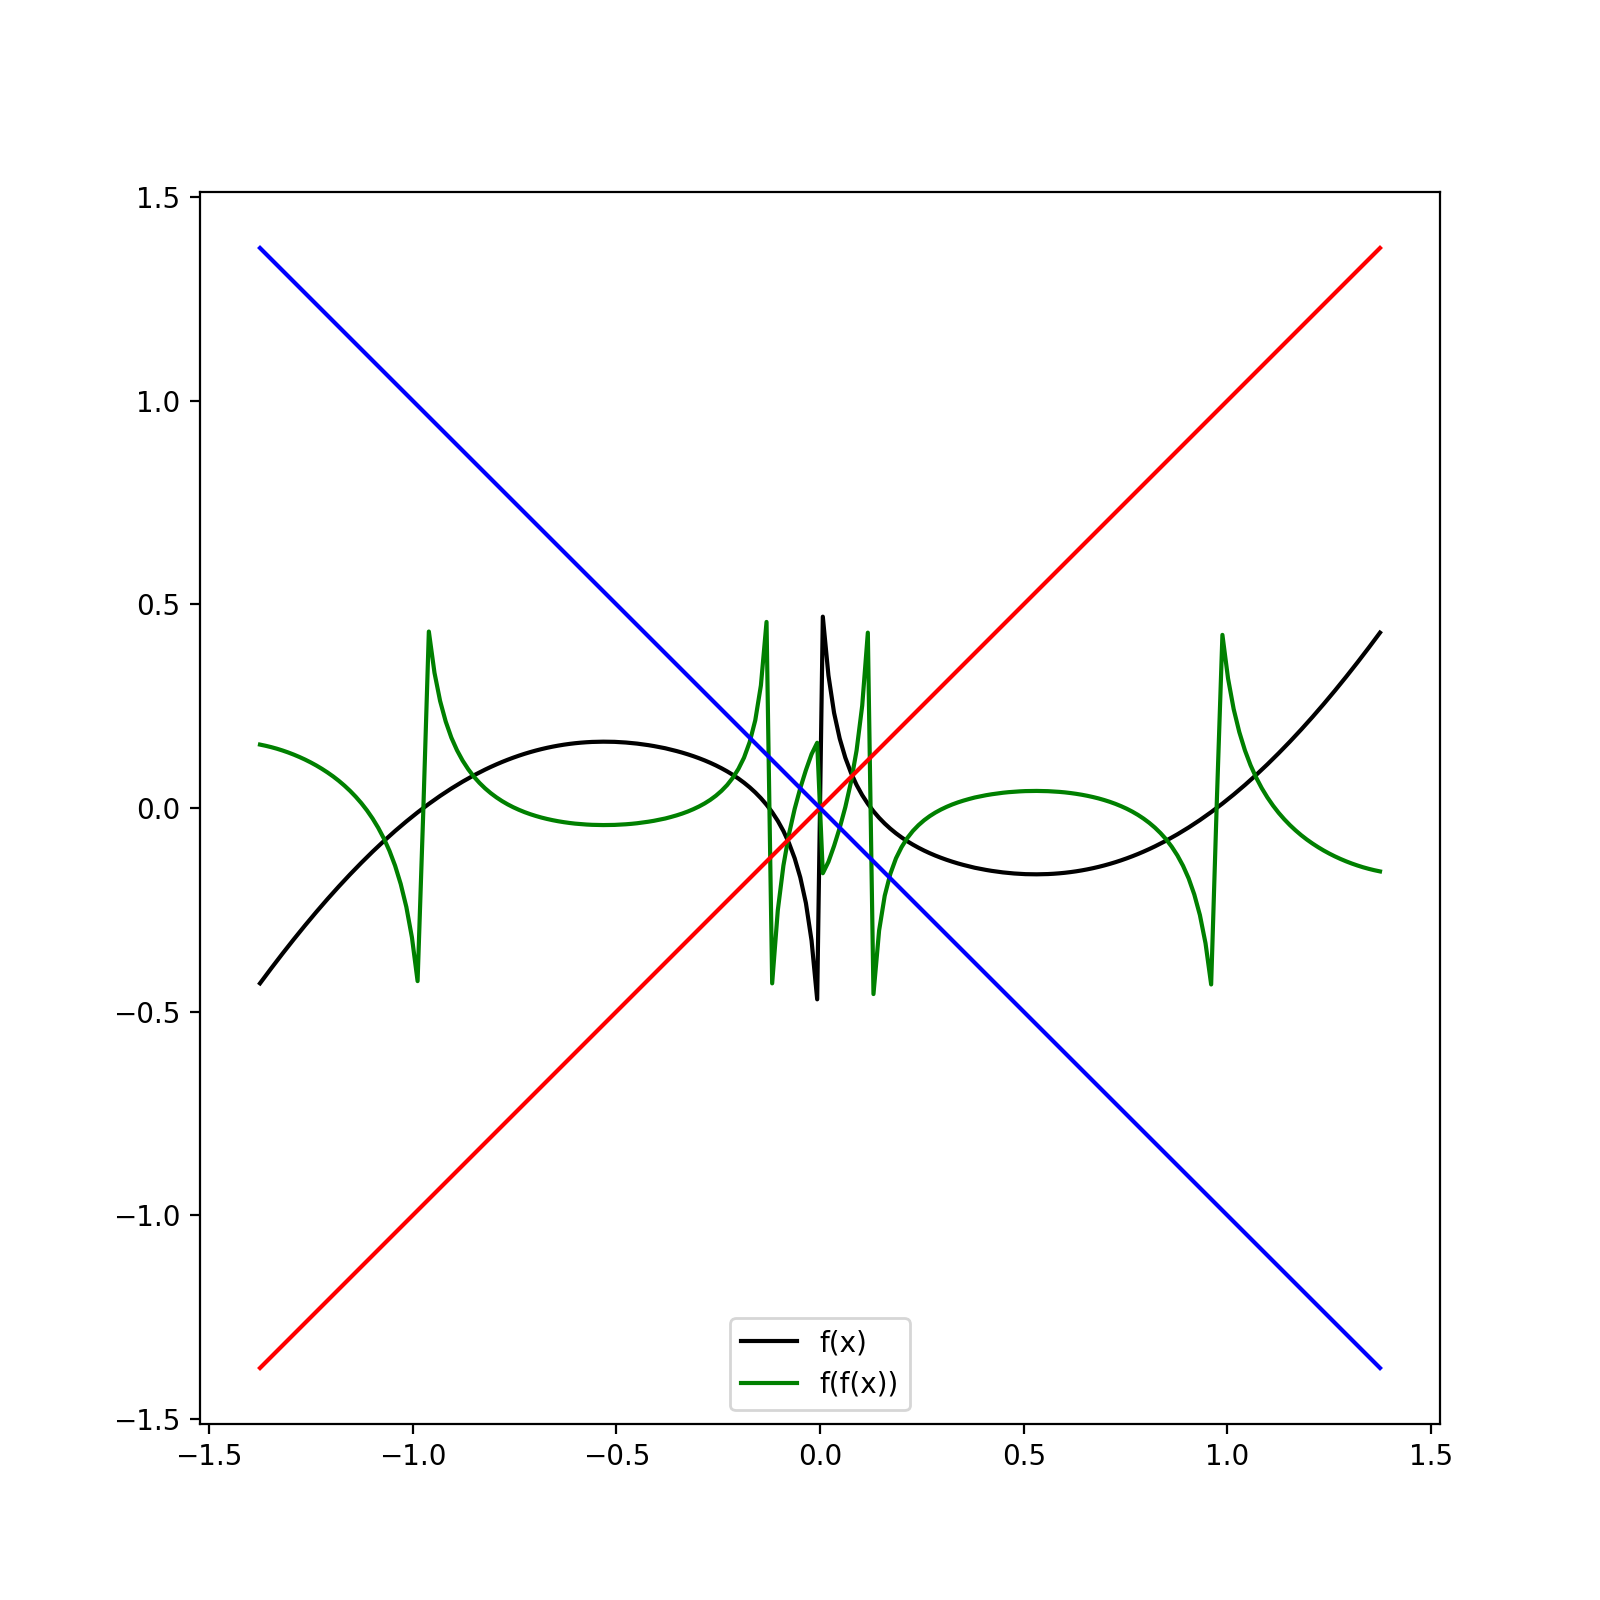

In [71]:
# Plot the return map

x = init_angle_new
y_diag_pos = init_angle_new
y_diag_neg = -init_angle_new

import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure(figsize = (4,4))
plt.plot(init_angle_new, f(init_angle_new), color = 'k', label = 'f(x)')
plt.plot(init_angle_new, f(f(init_angle_new)), color = 'g', label = 'f(f(x))')
# plt.plot(init_angle_new, f(f(f(init_angle_new))), marker = 'd', label = 'f(f(f(x)))')
# plt.plot(init_angle_new, f(f(f(f(init_angle_new)))), marker = '*', label = 'f(f(f(f(x))))')


plt.plot(x, y_diag_pos, color = 'r')
plt.plot(x, y_diag_neg, color = 'b')

# plt.plot(initial_angle_array_full, final_angle_array_full, linestyle = '-')
plt.legend()
plt.axis('equal')
plt.show()

In [90]:
# Logistic map analysis

r = 3.4

x_n_array = np.linspace(0,1,100)

x_n_1_array = r*x_n_array*(1 - x_n_array)

In [91]:
f_logistic = scipy.interpolate.interp1d(x_n_array, x_n_1_array)

<IPython.core.display.Javascript object>


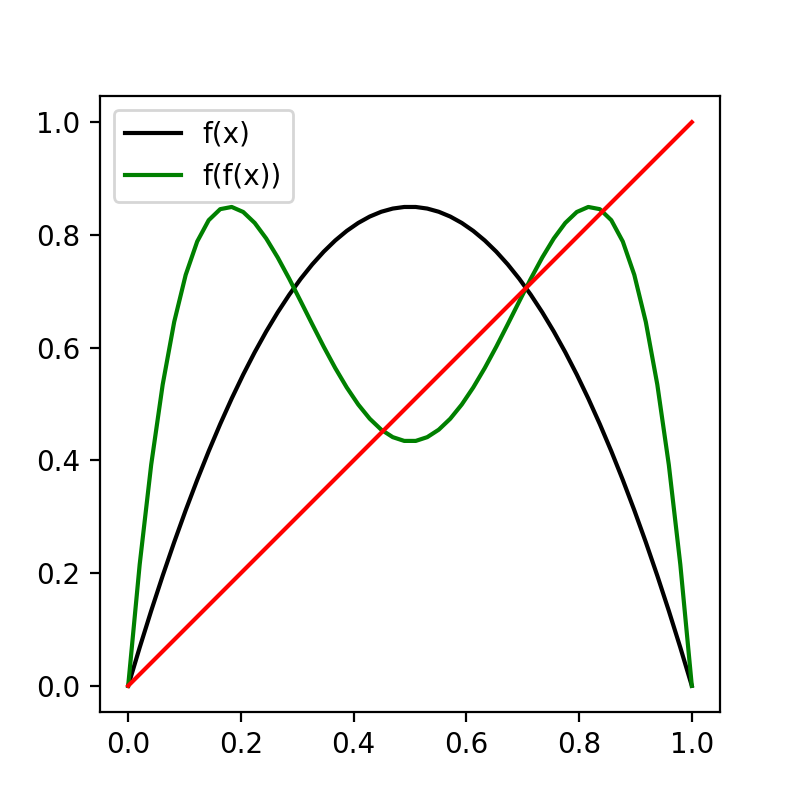

In [93]:
%matplotlib notebook

x_array = np.linspace(0,1,50)

y_diag_pos = x_array
y_diag_neg = -x_array

plt.figure(figsize = (4,4))
plt.plot(x_array, f_logistic(x_array), color = 'k', label = 'f(x)')
plt.plot(x_array, f_logistic(f_logistic(x_array)), color = 'g', label = 'f(f(x))')
# plt.plot(init_angle_new, f(f(f(init_angle_new))), marker = 'd', label = 'f(f(f(x)))')
# plt.plot(init_angle_new, f(f(f(f(init_angle_new)))), marker = '*', label = 'f(f(f(f(x))))')


plt.plot(x_array, y_diag_pos, color = 'r')
# plt.plot(x_array, y_diag_neg, color = 'b')

# plt.plot(initial_angle_array_full, final_angle_array_full, linestyle = '-')
plt.legend()
plt.axis('equal')
plt.savefig('Logisticmap.png')
plt.show()